# Mean, Meidan, Mode and Skew

- Mean = Average.

- Median = Middle value of data set in ascending order.

- Mode = Most frequent value.

- Skew = Out range data compared to average.

In [0]:
# Importing library

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [0]:
# Pandas display options

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

In [0]:
# # Plot style

# style.use('fivethirtyeight')
# style.use('seaborn')
style.use('ggplot')

In [0]:
# Creating function to plot.

def skew_plot(data_series, title):
    plt.figure(figsize=(10,10))
    sns.distplot(data_series)
    plt.title(title)
    plt.show()
    print(f'Mean = {data_series.mean():.2f},Median = {data_series.median():.2f}, Mode = {data_series.mode().values}, Skew = {data_series.skew():.2f}')
    
    

## Let's explain with an example

Let's consider we have sample data which denotes the burger price in different shops in **New York** and **Los Angeles**.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# File path

path = '/content/drive/My Drive/GitHub/Mean_Median/data/' # If you are using colab, use this variable and comment the below one.
# path = 'data/' # If you are using normal editor, use this variable and comment the above one.


In [0]:
# Reading file

mean_median_df = pd.read_excel(f'{path}Mean_Median.xlsx', sheet_name='Mean_Median')

In [26]:
mean_median_df

,NW_Shops,Burger_price_in_NewYork,LA_Shops,Burger_price_in_Los_Angeles
0,Shop1,1,Shop1,1.00
1,Shop2,2,Shop2,2.00
2,Shop3,3,Shop3,3.00
3,Shop4,3,Shop4,4.00
4,Shop5,5,Shop5,5.00
5,Shop6,6,Shop6,6.00
6,Shop7,7,Shop7,7.00
7,Shop8,8,Shop8,8.00
8,Shop9,9,Shop9,9.00
9,Shop10,11,Shop10,10.00


### Average price (Mean)

Let's find the average price of burger in both the states and consider that *below average price* as **cheap**, *above average price* as **costly**.

In [27]:
# Let's check the average price of burger in each state.

avg_nw = mean_median_df['Burger_price_in_NewYork'].mean()
avg_la = mean_median_df['Burger_price_in_Los_Angeles'].mean()

print(f'Average burger price in New York = {avg_nw} and Los Angeles = {avg_la}')

Average burger price in New York = 11.0 and Los Angeles = 5.5


As said, the average burger price in Los Angeles is 5.5. 

Hence, In Los Angeles

 - burger prices - **1, 2, 3, 4, 5** are considered as *cheap*.

 - burger prices - **6, 7, 8, 9, 10** are considered as *expensive*.


In New York,

 - burger prices - **1, 2, 3, 5, 6, 7, 8, 9** are considered as *cheap*.

 - burger prices - **66** is considered as *expensive*.

 Why this difference in average price between 2 states?

Is this correct measure to set the cut off values to distinguish cheap and expensive?

Hmmm. Well, Let's check Min and Max



In [28]:
# Cheapest, expensive price of Burger in New York and Los Angeles.

cheap_nw = mean_median_df['Burger_price_in_NewYork'].min()
expensive_nw = mean_median_df['Burger_price_in_NewYork'].max()

cheap_la = mean_median_df['Burger_price_in_Los_Angeles'].min()
expensive_la = mean_median_df['Burger_price_in_Los_Angeles'].max()

print(f'Cheapest burger price in New York = {cheap_nw} and Los Angeles = {int(cheap_la)}')
print(f'Expensive burger price in New York = {expensive_nw} and Los Angeles = {int(expensive_la)}')

Cheapest burger price in New York = 1 and Los Angeles = 1
Expensive burger price in New York = 66 and Los Angeles = 10


Cheapest price of burger is same in both the places. But one of the shop in New York sells burger at too costly compared to Los Angeles.

How to find the cut off value which distinguish cheap and expensive price range? Because average price doesnt seem to be correct.

In [29]:
median_ny = mean_median_df['Burger_price_in_NewYork'].median()
median_la = mean_median_df['Burger_price_in_Los_Angeles'].median()
print(f'Median burger price in New York = {median_ny} and Los Angeles = {median_la}')

Median burger price in New York = 6.0 and Los Angeles = 5.5


- Price below 6.0 in New York are the cheapest and above 6 are expensive. 

    (1,2,3,5) - Cheap. (7,8,9,11,66) - Expensive.

- Price below 5.5 in Los Angeles are the cheapest and above 5.5 are expensive.

    (1,2,3,4,5) - Cheap. (6,7,8,9,10) - Expensive.


Median seems to be right. But why not average? Because, burger in shop11 (New York) is too costly which is causing the more difference in averages between 2 states. But how to find the price is too high or too low. Thats where skewness helps. Let's understand in details with some plotting.

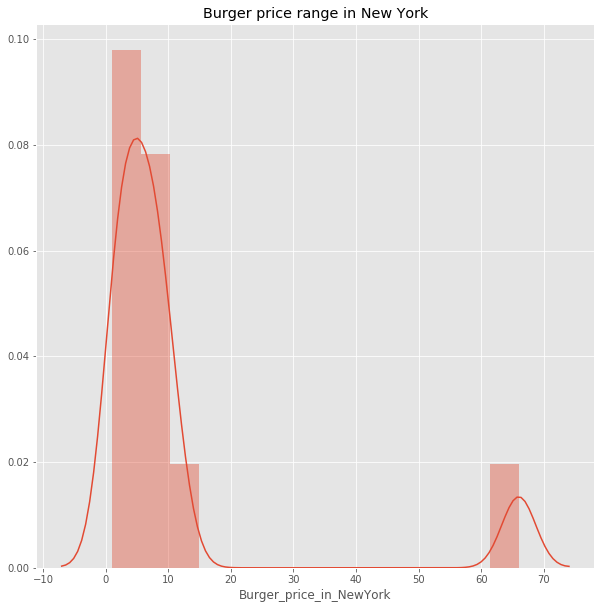

Mean = 11.00,Median = 6.00, Mode = [3], Skew = 3.15


In [30]:
skew_plot(mean_median_df['Burger_price_in_NewYork'], 'Burger price range in New York')

The above plot shows the burger price in New york. we have a bar at 66 which is on the right side of the plot. The distribution curve extends to right side (Right/Positive Skew). That means the burger price is too high compared to average.


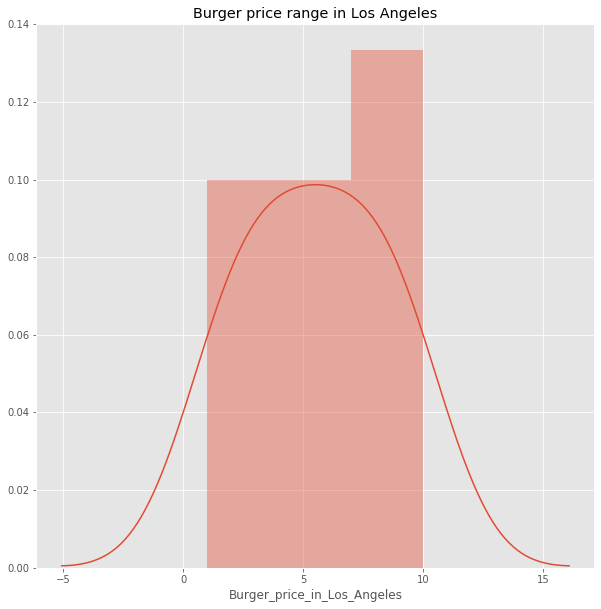

Mean = 5.50,Median = 5.50, Mode = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.], Skew = 0.00


In [31]:
skew_plot(mean_median_df['Burger_price_in_Los_Angeles'].dropna(), 'Burger price range in Los Angeles')

The above plot shows the burger price in Los Angeles. The distribution curve equally spread, That means there is no too high or too low burger price compared to average.

## Let's deal with real data

Titanic dataset. [Download here](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

In [0]:
# Titanic dataset

titanic_df = pd.read_csv(f'{path}titanic.csv')

In [33]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05


### Right Skew

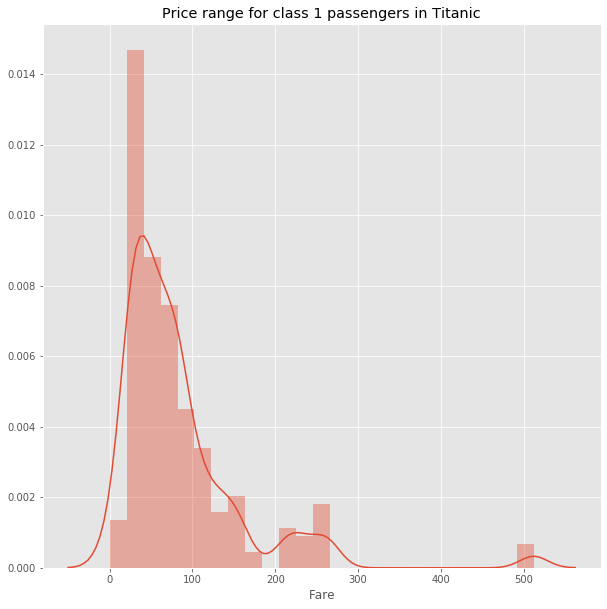

Mean = 84.15,Median = 60.29, Mode = [26.55], Skew = 2.84


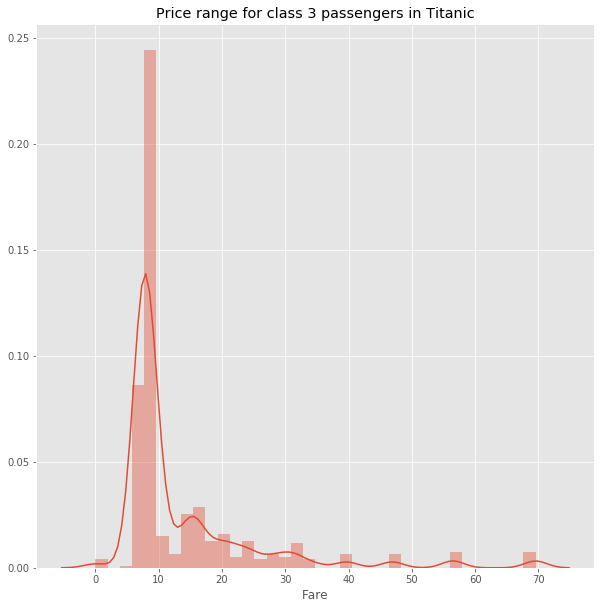

Mean = 13.71,Median = 8.05, Mode = [8.05], Skew = 2.72


In [34]:
skew_plot(titanic_df[titanic_df['Pclass'] == 1].Fare, 'Price range for class 1 passengers in Titanic')

skew_plot(titanic_df[titanic_df['Pclass'] == 3].Fare, 'Price range for class 3 passengers in Titanic')

### No Skew

Almost no skew (Slightly right skewed). :-p


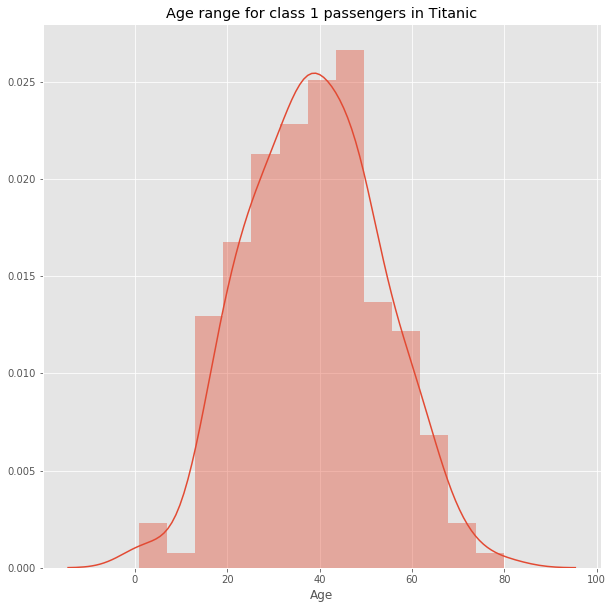

Mean = 38.79,Median = 38.50, Mode = [35. 36.], Skew = 0.06


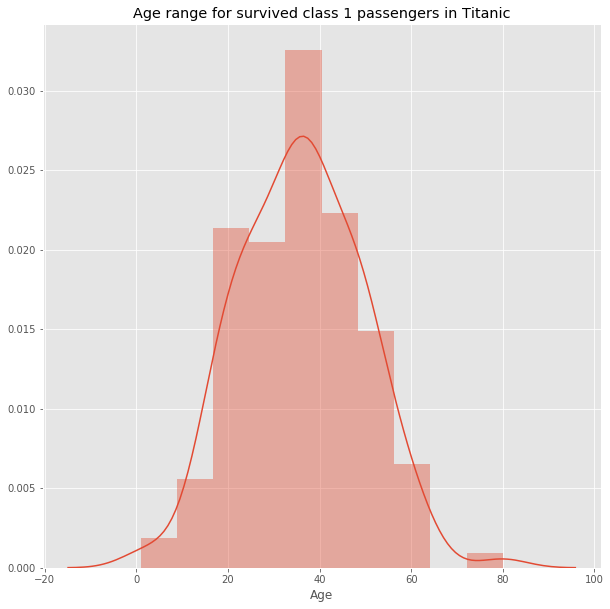

Mean = 35.96,Median = 36.00, Mode = [35.], Skew = 0.13


In [35]:
skew_plot(titanic_df[titanic_df['Pclass'] == 1].Age, 'Age range for class 1 passengers in Titanic')

skew_plot(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 1)].Age, 'Age range for survived class 1 passengers in Titanic')

### Left Skew

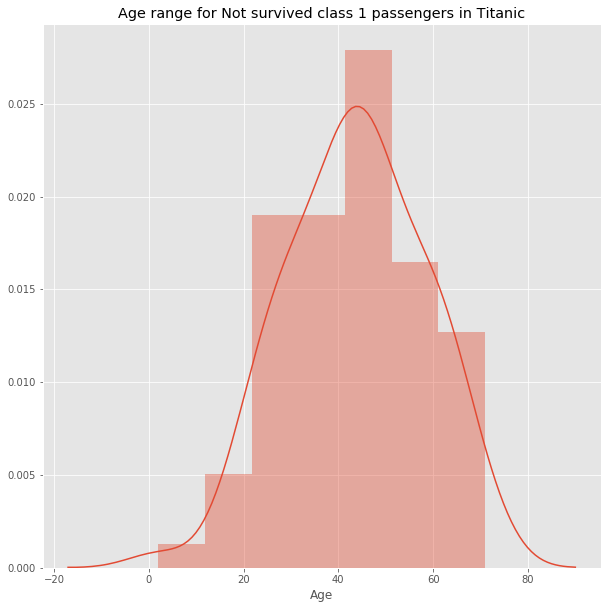

Mean = 43.59,Median = 45.00, Mode = [45. 47.], Skew = -0.19


In [36]:
skew_plot(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 0)].Age, 'Age range for Not survived class 1 passengers in Titanic')

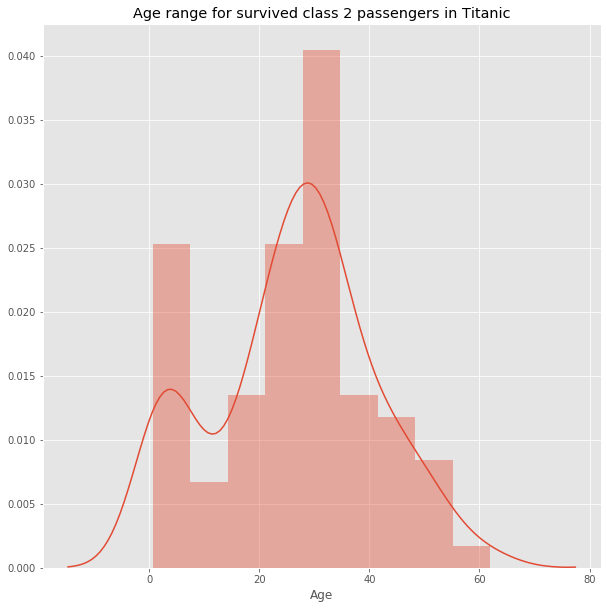

Mean = 26.17,Median = 28.00, Mode = [24.], Skew = -0.07


In [37]:
skew_plot(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Survived'] == 1)].Age, 'Age range for survived class 2 passengers in Titanic')

## Summary

It is not easy to find the skewness by plot. we have to rely on skew calculation(function).


If Mean and Median are equal or almost equal, Average(Mean) is used for central tendency. If Mean is not equal to Median then Median is used for central tendency measurement.

Mean Median | Skew | Central tendency
--- | --- | ---
`Mean = Median` | No Skew | **Mean (Average)**
`Mean > Median` | Right Skew | **Median**
`Mean < Median` | Left Skew | **Median**
